# Read the insolation and sea ice annual cycle data

In [2]:
from scipy.io import loadmat

# Load the file
file_path = 'D:/VScode/EBM_NH_SH_sea_ice/EBM_data/seaice_annu_c_nh_all_n400_20240226_1010.mat'
data = loadmat(file_path)

seaice_annu_c_nh_all = data['seaice_annu_c_nh_all'] 

file_path = 'D:/VScode/EBM_NH_SH_sea_ice/EBM_data/Sol60N_all_n400_20240226_1010.mat'
data = loadmat(file_path)

Sol60N_all = data['Sol60N_all'] 


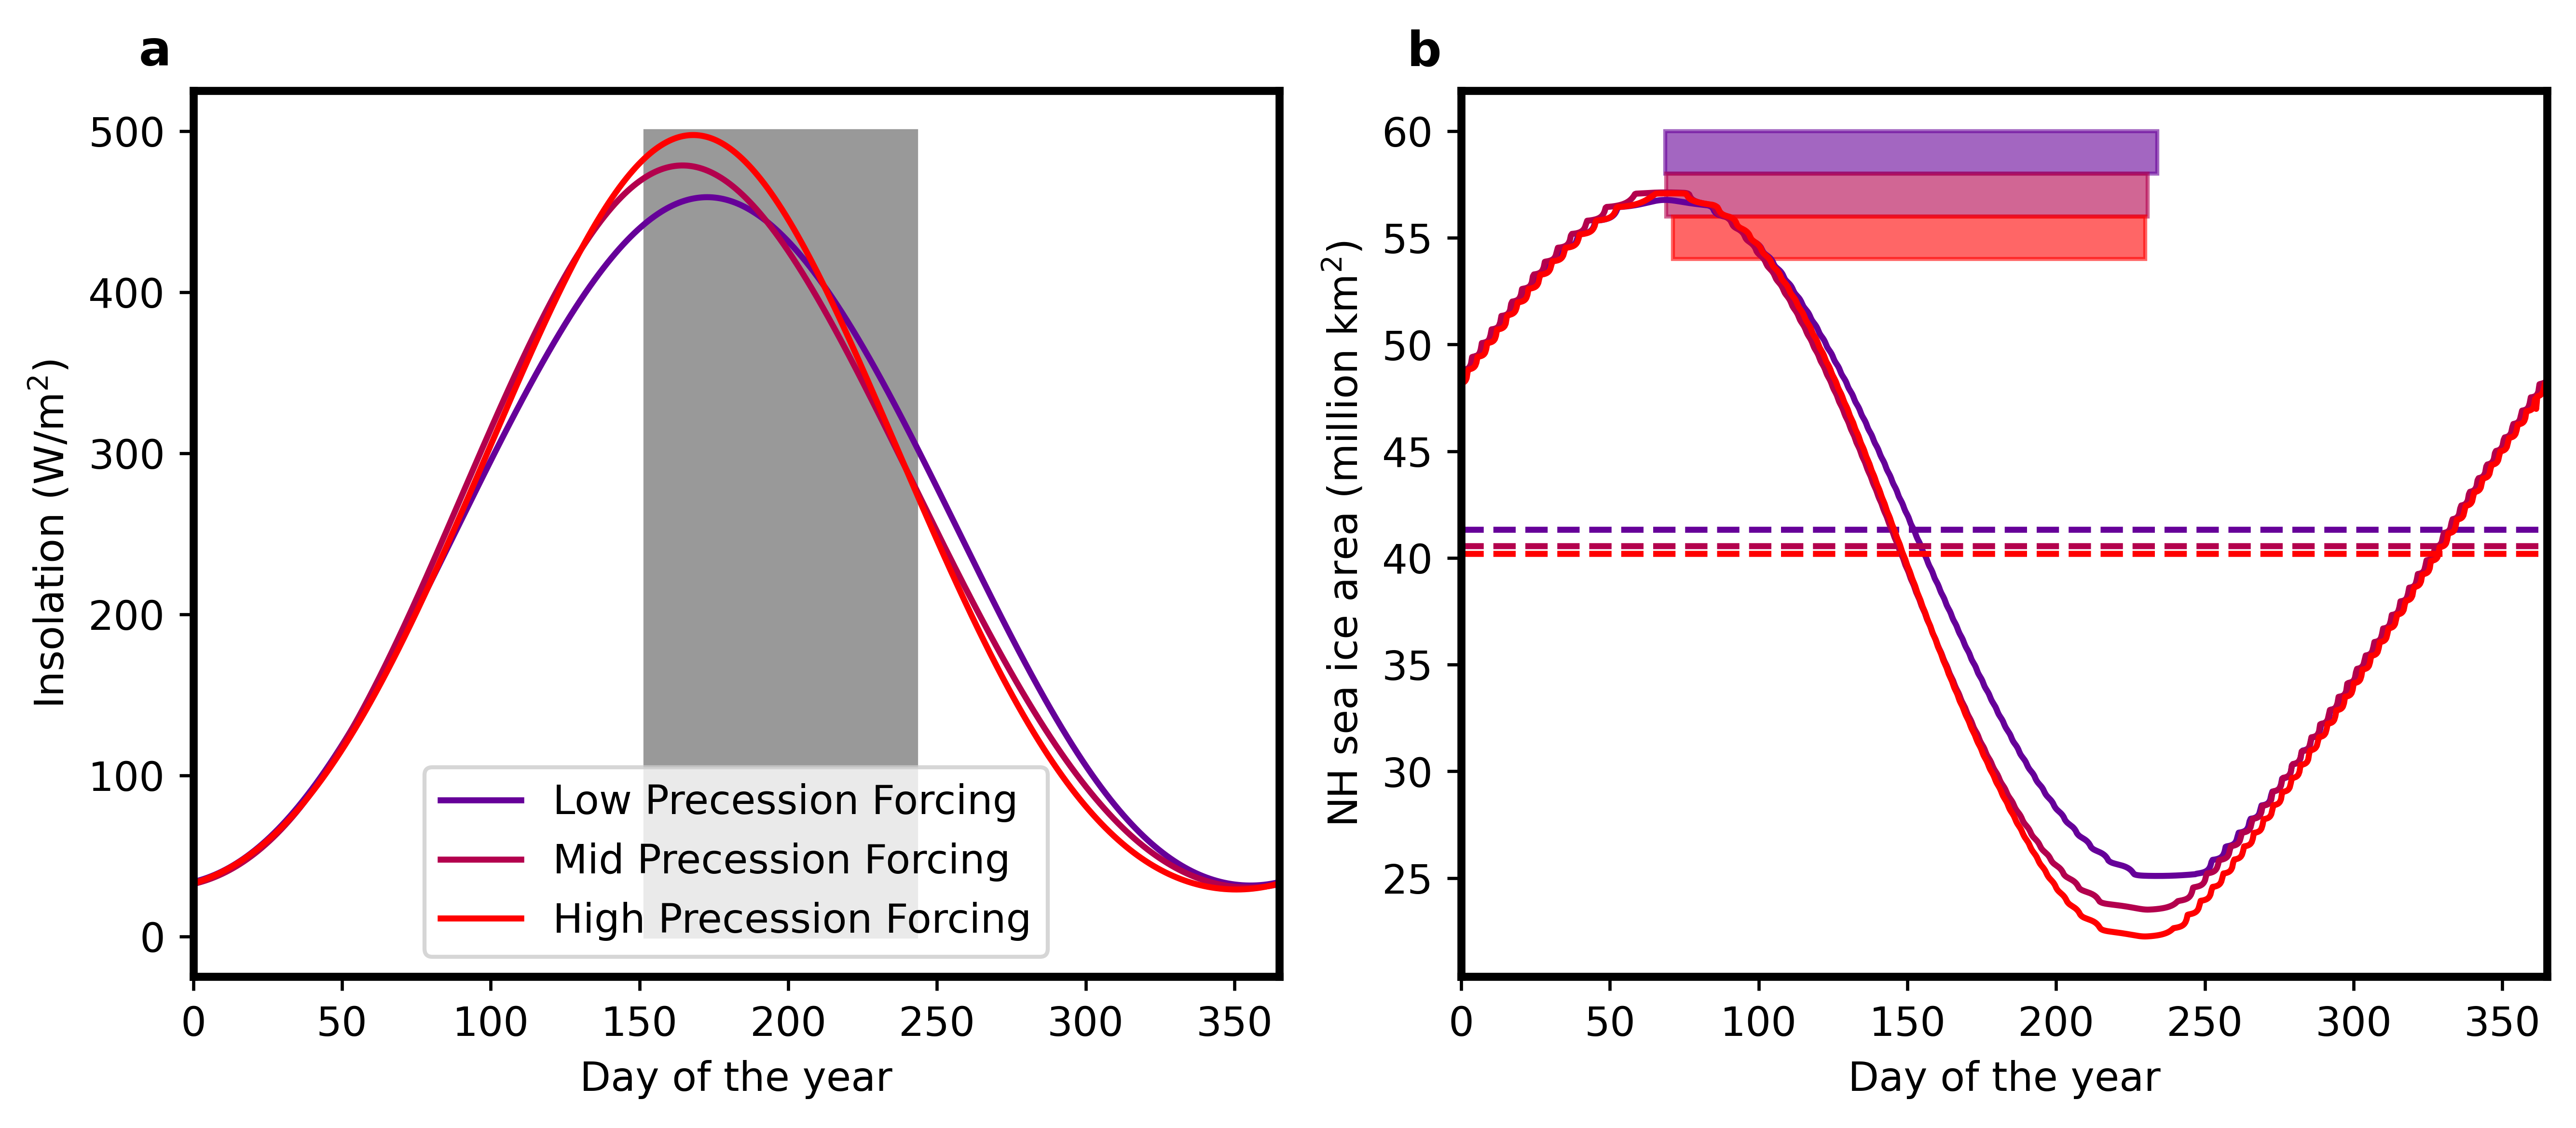

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# exp_labels=['Perihelion at NH winter solstice','Perihelion occurs at NH autumnal equinox','Perihelion occurs at NH summer equinox']
exp_labels=['Low Precession Forcing','Mid Precession Forcing','High Precession Forcing']

# Set up the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4),dpi=600)  # Adjusted figure size for better fit

# First subplot for Solar Radiation
time_of_year = np.arange(1, len(Sol60N_all[:, 0]) + 1) / 10
axs[0].add_patch(patches.Rectangle((152, 0), 91, 500, color=[0.6, 0.6, 0.6]))
a0 = 0.1
for i in range(3):
    a = a0 + 0.3 * (i + 1)
    axs[0].plot(time_of_year, Sol60N_all[:, i], color=[a, 0, 1 - a], label=exp_labels[i])

axs[0].set_xlabel('Day of the year')
axs[0].set_ylabel('Insolation (W/m$^2$)')
axs[0].set_xlim([0, 365])
# legend
# axs[0].legend(fontsize=8,loc='upper right')
axs[0].legend()


# Second subplot for Sea Ice Area
time_of_year_ice = np.arange(1, len(seaice_annu_c_nh_all[:, 0]) + 1)
time_of_year_ice = time_of_year_ice / (len(seaice_annu_c_nh_all[:, 0]) / 365)

for i in range(3):
    a = a0 + 0.3 * (i + 1)
    time_of_ice_max = time_of_year_ice[seaice_annu_c_nh_all[:, i] == np.max(seaice_annu_c_nh_all[:, i])]
    time_of_ice_min = time_of_year_ice[seaice_annu_c_nh_all[:, i] == np.min(seaice_annu_c_nh_all[:, i])]
    axs[1].add_patch(patches.Rectangle((time_of_ice_max[0], 60 - 2 * (i + 1)), time_of_ice_min[0] - time_of_ice_max[0], 2, color=[a, 0, 1 - a,0.6]))
    axs[1].plot(time_of_year_ice, seaice_annu_c_nh_all[:, i], color=[a, 0, 1 - a], label=exp_labels[i])
    axs[1].plot([0, 365], [np.mean(seaice_annu_c_nh_all[:, i]), np.mean(seaice_annu_c_nh_all[:, i])], color=[a, 0, 1 - a], linestyle='--')

axs[1].set_xlabel('Day of the year')
axs[1].set_ylabel('NH sea ice area (million km$^2$)')
axs[1].set_xlim([0, 365])
# legend
# axs[1].legend()

# for each subplot, set the line width of the box to be 2
for ax in axs:
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

# add text a and b to the subplots
axs[0].text(-0.05, 1.07, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1].text(-0.05, 1.07, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top')

plt.tight_layout()
plt.show()
